In [2]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [4]:
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteN41X1I/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteN41X1I/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteN41X1I/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [6]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [7]:
# learning rate
learning_rate = 0.0001

# optimizers
optimizer = tf.keras.optimizers.Adam(learning_rate) # adam
# optimizer = tf.keras.optimizers.RMSprom(learning_rate) # rms prop

In [8]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [9]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])

In [10]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 712s 2s/step - loss: 0.5681 - accuracy: 0.6490 - val_loss: 0.4227 - val_accuracy: 0.8240
Epoch 2/10
391/391 [==============================] - 686s 2s/step - loss: 0.3731 - accuracy: 0.8326 - val_loss: 0.3576 - val_accuracy: 0.8448
Epoch 3/10
391/391 [==============================] - 691s 2s/step - loss: 0.3440 - accuracy: 0.8497 - val_loss: 0.3426 - val_accuracy: 0.8557
Epoch 4/10
391/391 [==============================] - 695s 2s/step - loss: 0.3262 - accuracy: 0.8600 - val_loss: 0.3382 - val_accuracy: 0.8474
Epoch 5/10
391/391 [==============================] - 697s 2s/step - loss: 0.3190 - accuracy: 0.8632 - val_loss: 0.3388 - val_accuracy: 0.8531
Epoch 6/10
391/391 [==============================] - 698s 2s/step - loss: 0.3167 - accuracy: 0.8636 - val_loss: 0.3330 - val_accuracy: 0.8521
Epoch 7/10
391/391 [==============================] - 730s 2s/step - loss: 0.3112 - accuracy: 0.8684 - val_loss: 0.3420 - val_accuracy: 0.8385

In [13]:
history.history

{'loss': [0.5680782198905945,
  0.37313956022262573,
  0.3439830541610718,
  0.3261817395687103,
  0.3189975917339325,
  0.3166782259941101,
  0.3111852705478668,
  0.3112495243549347,
  0.30704164505004883,
  0.30807697772979736],
 'accuracy': [0.6489599943161011,
  0.8325600028038025,
  0.8497200012207031,
  0.8600000143051147,
  0.8631600141525269,
  0.8635600209236145,
  0.8683599829673767,
  0.8678399920463562,
  0.8690800070762634,
  0.8684800267219543],
 'val_loss': [0.422672837972641,
  0.3576369881629944,
  0.3426472246646881,
  0.33822107315063477,
  0.33884942531585693,
  0.3330228924751282,
  0.3420053720474243,
  0.3349396884441376,
  0.34213384985923767,
  0.32692834734916687],
 'val_accuracy': [0.8239583373069763,
  0.8447916507720947,
  0.8557291626930237,
  0.8473958373069763,
  0.8531249761581421,
  0.8520833253860474,
  0.8385416865348816,
  0.8447916507720947,
  0.859375,
  0.8557291626930237]}

(0.0, 0.5811300486326217)

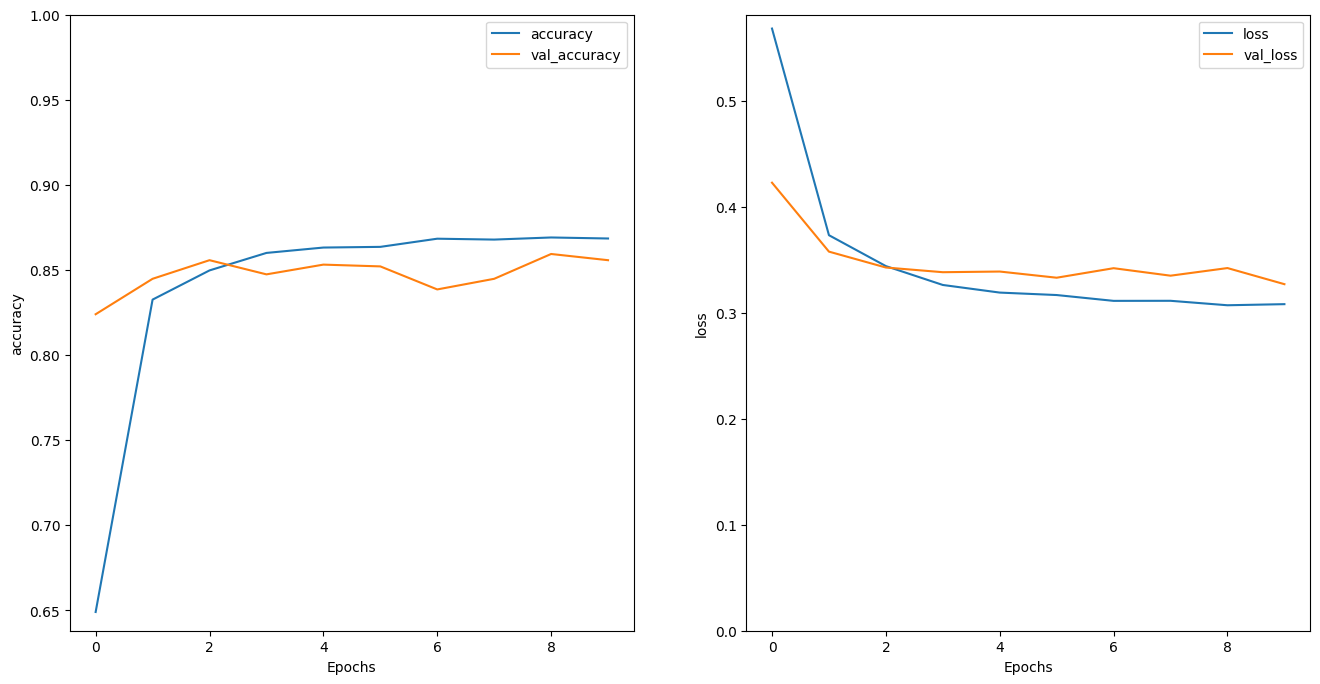

In [11]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [12]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))

1/1 [==============================] - 5s 5s/step


In [14]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 164s 420ms/step - loss: 0.3198 - accuracy: 0.8570
Test Loss: 0.31982770562171936
Test Accuracy: 0.8569999933242798
